<h1>Lab 25: Encoding Categorical Data for Machine Learning</h1>
<h2>Objective</h2>
<p>The objective of this lab is to teach you various techniques for transforming categorical data into numerical data suitable for machine learning algorithms. You will learn basic and advanced encoding methods, including Label Encoding, One-Hot Encoding, Manual Mapping, Frequency Encoding, and Target Encoding. By the end of this lab, you will understand when and how to apply each encoding technique and be aware of their pros and cons.</p>
<h2>Expected Outcomes</h2>
<p>By the end of this lab, you will be able to:</p>
<ul>
<li>Identify categorical variables in a dataset.</li>
<li>Understand the theory behind different encoding techniques.</li>
<li>Apply various encoding methods to transform categorical data.</li>
<li>Recognize the implications of each encoding method on machine learning models.</li>
<li>Evaluate the pros and cons of different encoding techniques.</li>
</ul>

---

<h2>Step 1. Import Required Libraries</h2>
<p>In this step, we will import the necessary libraries for data manipulation and encoding.</p>

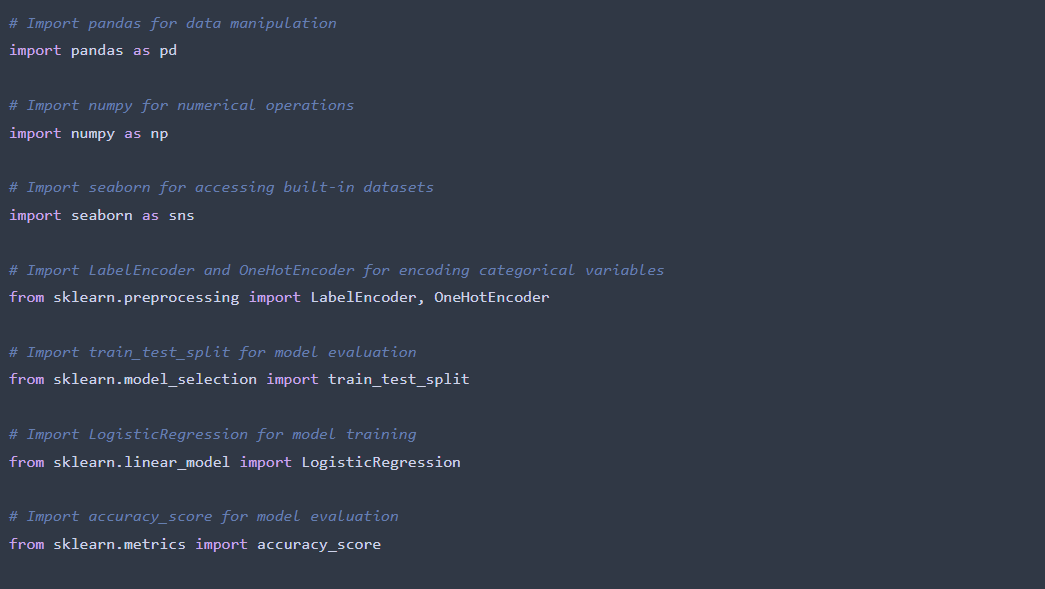

In [1]:
# Import pandas for data manipulation
import pandas as pd

# Import numpy for numerical operations
import numpy as np

# Import seaborn for accessing built-in datasets
import seaborn as sns

# Import LabelEncoder and OneHotEncoder for encoding categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Import train_test_split for model evaluation
from sklearn.model_selection import train_test_split

# Import LogisticRegression for model training
from sklearn.linear_model import LogisticRegression

# Import accuracy_score for model evaluation
from sklearn.metrics import accuracy_score


---

<h2>Step 2. Load and Explore the Dataset</h2>
<p>We will use the <strong>Titanic</strong> dataset, which contains both categorical and numerical variables.</p>
<h3>Load and explore the Dataset</h3>

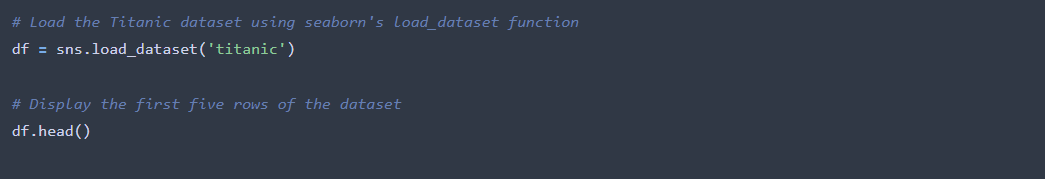

In [ ]:
# Load the Titanic dataset using seaborn's load_dataset function
df = sns.load_dataset('titanic')

# Display the first five rows of the dataset
df.head()


<h3>Check for Missing Values</h3>

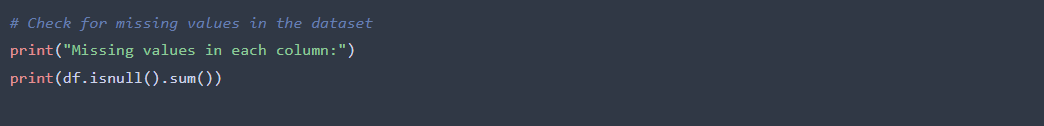

In [ ]:
# Check for missing values in the dataset
print("Missing values in each column:")
print(df.isnull().sum())

---

<h2>Step 3. Identify Categorical Variables</h2>
<p>Categorical variables are features that represent categories or labels rather than numerical values.</p>
<h3>Identify Categorical Columns</h3>

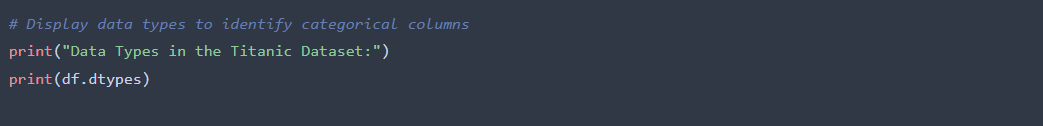

In [3]:
# Display data types to identify categorical columns
print("Data Types in the Titanic Dataset:")
print(df.dtypes)

Data Types in the Titanic Dataset:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


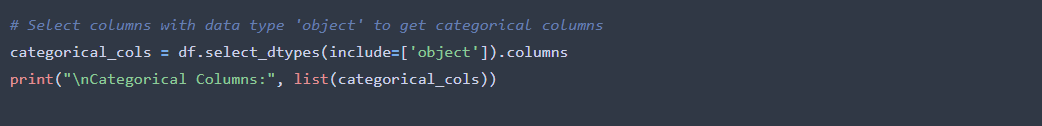

In [4]:
# Select columns with data type 'object' to get categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCatergorical Columns:", list(categorical_cols))


Catergorical Columns: ['sex', 'embarked', 'who', 'embark_town', 'alive']


<h3>Explore Unique Values in Categorical Columns</h3>

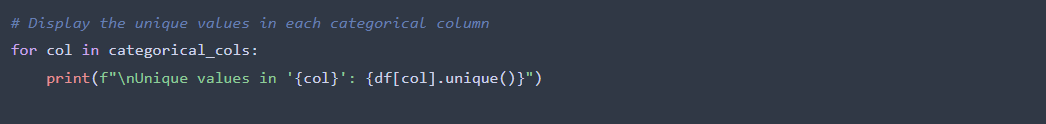

In [6]:
# Display the unique values in each categorical column
for col in categorical_cols:
    print(f"\nUnique values in '{col}': {df[col].unique()}")


Unique values in 'sex': ['male' 'female']

Unique values in 'embarked': ['S' 'C' 'Q' nan]

Unique values in 'who': ['man' 'woman' 'child']

Unique values in 'embark_town': ['Southampton' 'Cherbourg' 'Queenstown' nan]

Unique values in 'alive': ['no' 'yes']


---

<h2>Step 4. Basic Encoding Techniques</h2>
<h3>What Are Encoding Techniques?</h3>
<p>Encoding techniques are methods used to convert categorical variables into numerical formats that can be used by machine learning algorithms.</p>

<h3>4.1 Label Encoding</h3>
<h4>Theory</h4>
<ul>
<li><strong>Label Encoding</strong> assigns a unique numerical value to each category in a categorical variable.</li>
<li>It is suitable for ordinal variables where the categories have an inherent order.</li>
<li>However, it may introduce unintended ordinal relationships in nominal variables.</li>
</ul>

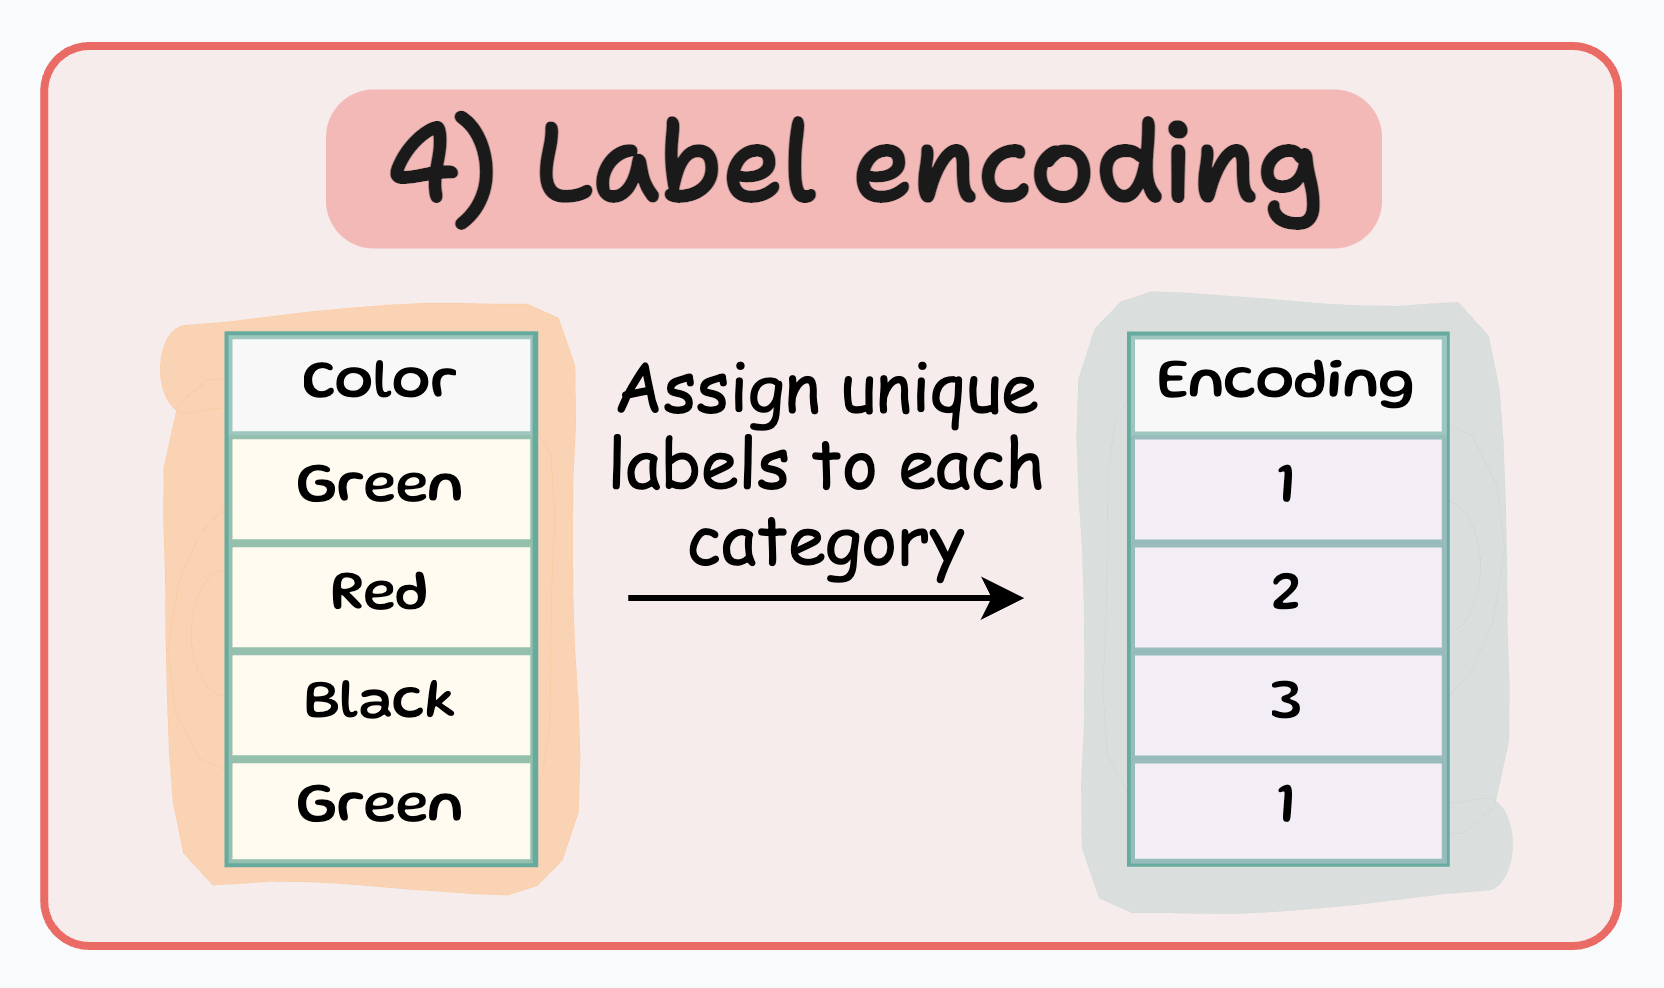
 Source: https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F86a58fb1-a019-48af-ac6f-9b91e8191da3_1664x988.png

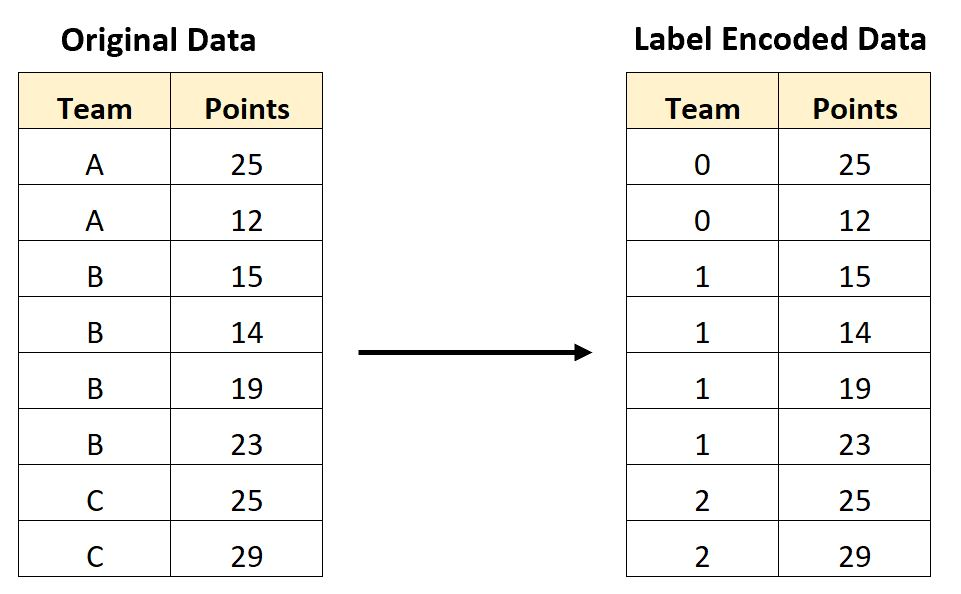
 Source: https://www.statology.org/wp-content/uploads/2022/08/labelencode2-1.jpg

<h4>Practical Example with the 'sex' Column</h4>

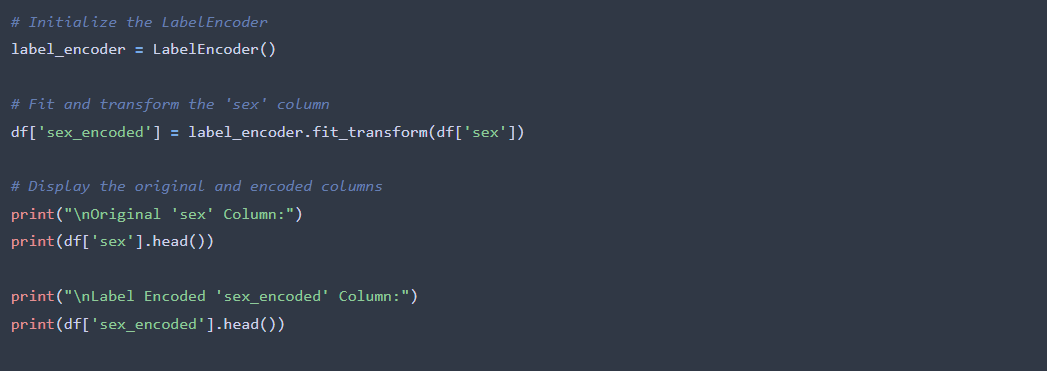

In [7]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'sex' column
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])

# Display the original and encoded columns
print("\nOriginal 'sex' Column:")
print(df['sex_encoded'].head())


Original 'sex' Column:
0    1
1    0
2    0
3    0
4    1
Name: sex_encoded, dtype: int32


<h4>Mapping of Labels to Numbers</h4>

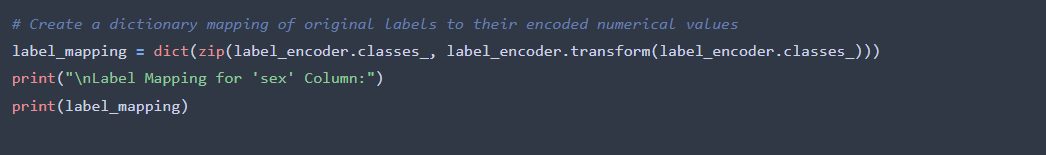

In [8]:
# Create a dictionary mapping of original labels to their encoded numerical values
label_mapping = dict(zip(label_encoder.class_, label_encoder.transform(label_encoder.classes_)))
print("\nLabel Mapping for 'sex' Column:")
print(label_mapping)

AttributeError: 'LabelEncoder' object has no attribute 'class_'

<h3>4.2 One-Hot Encoding</h3>
<h4>Theory</h4>
<ul>
<li><strong>One-Hot Encoding</strong> creates binary columns for each category.</li>
<li>Each category is represented by a column with 1 indicating presence and 0 indicating absence.</li>
<li>Avoids ordinal relationships introduced by Label Encoding.</li>
</ul>

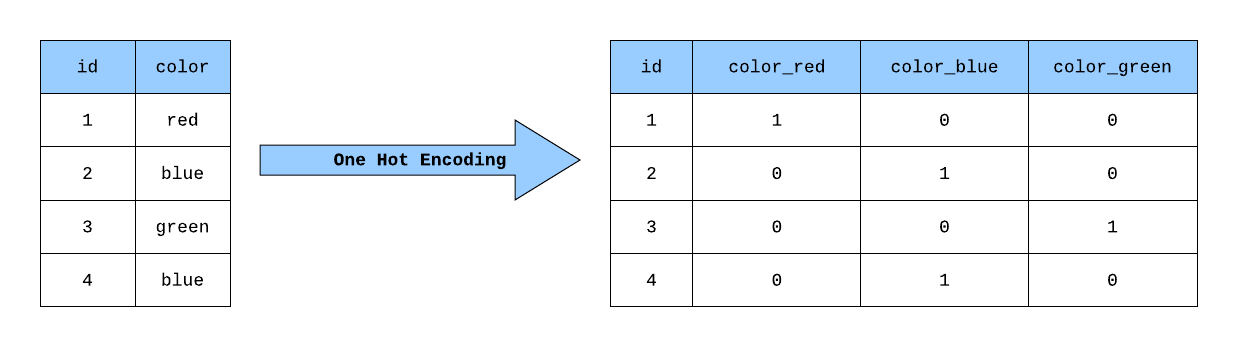
 Source: https://miro.medium.com/v2/resize:fit:1400/1*ggtP4a5YaRx6l09KQaYOnw.png

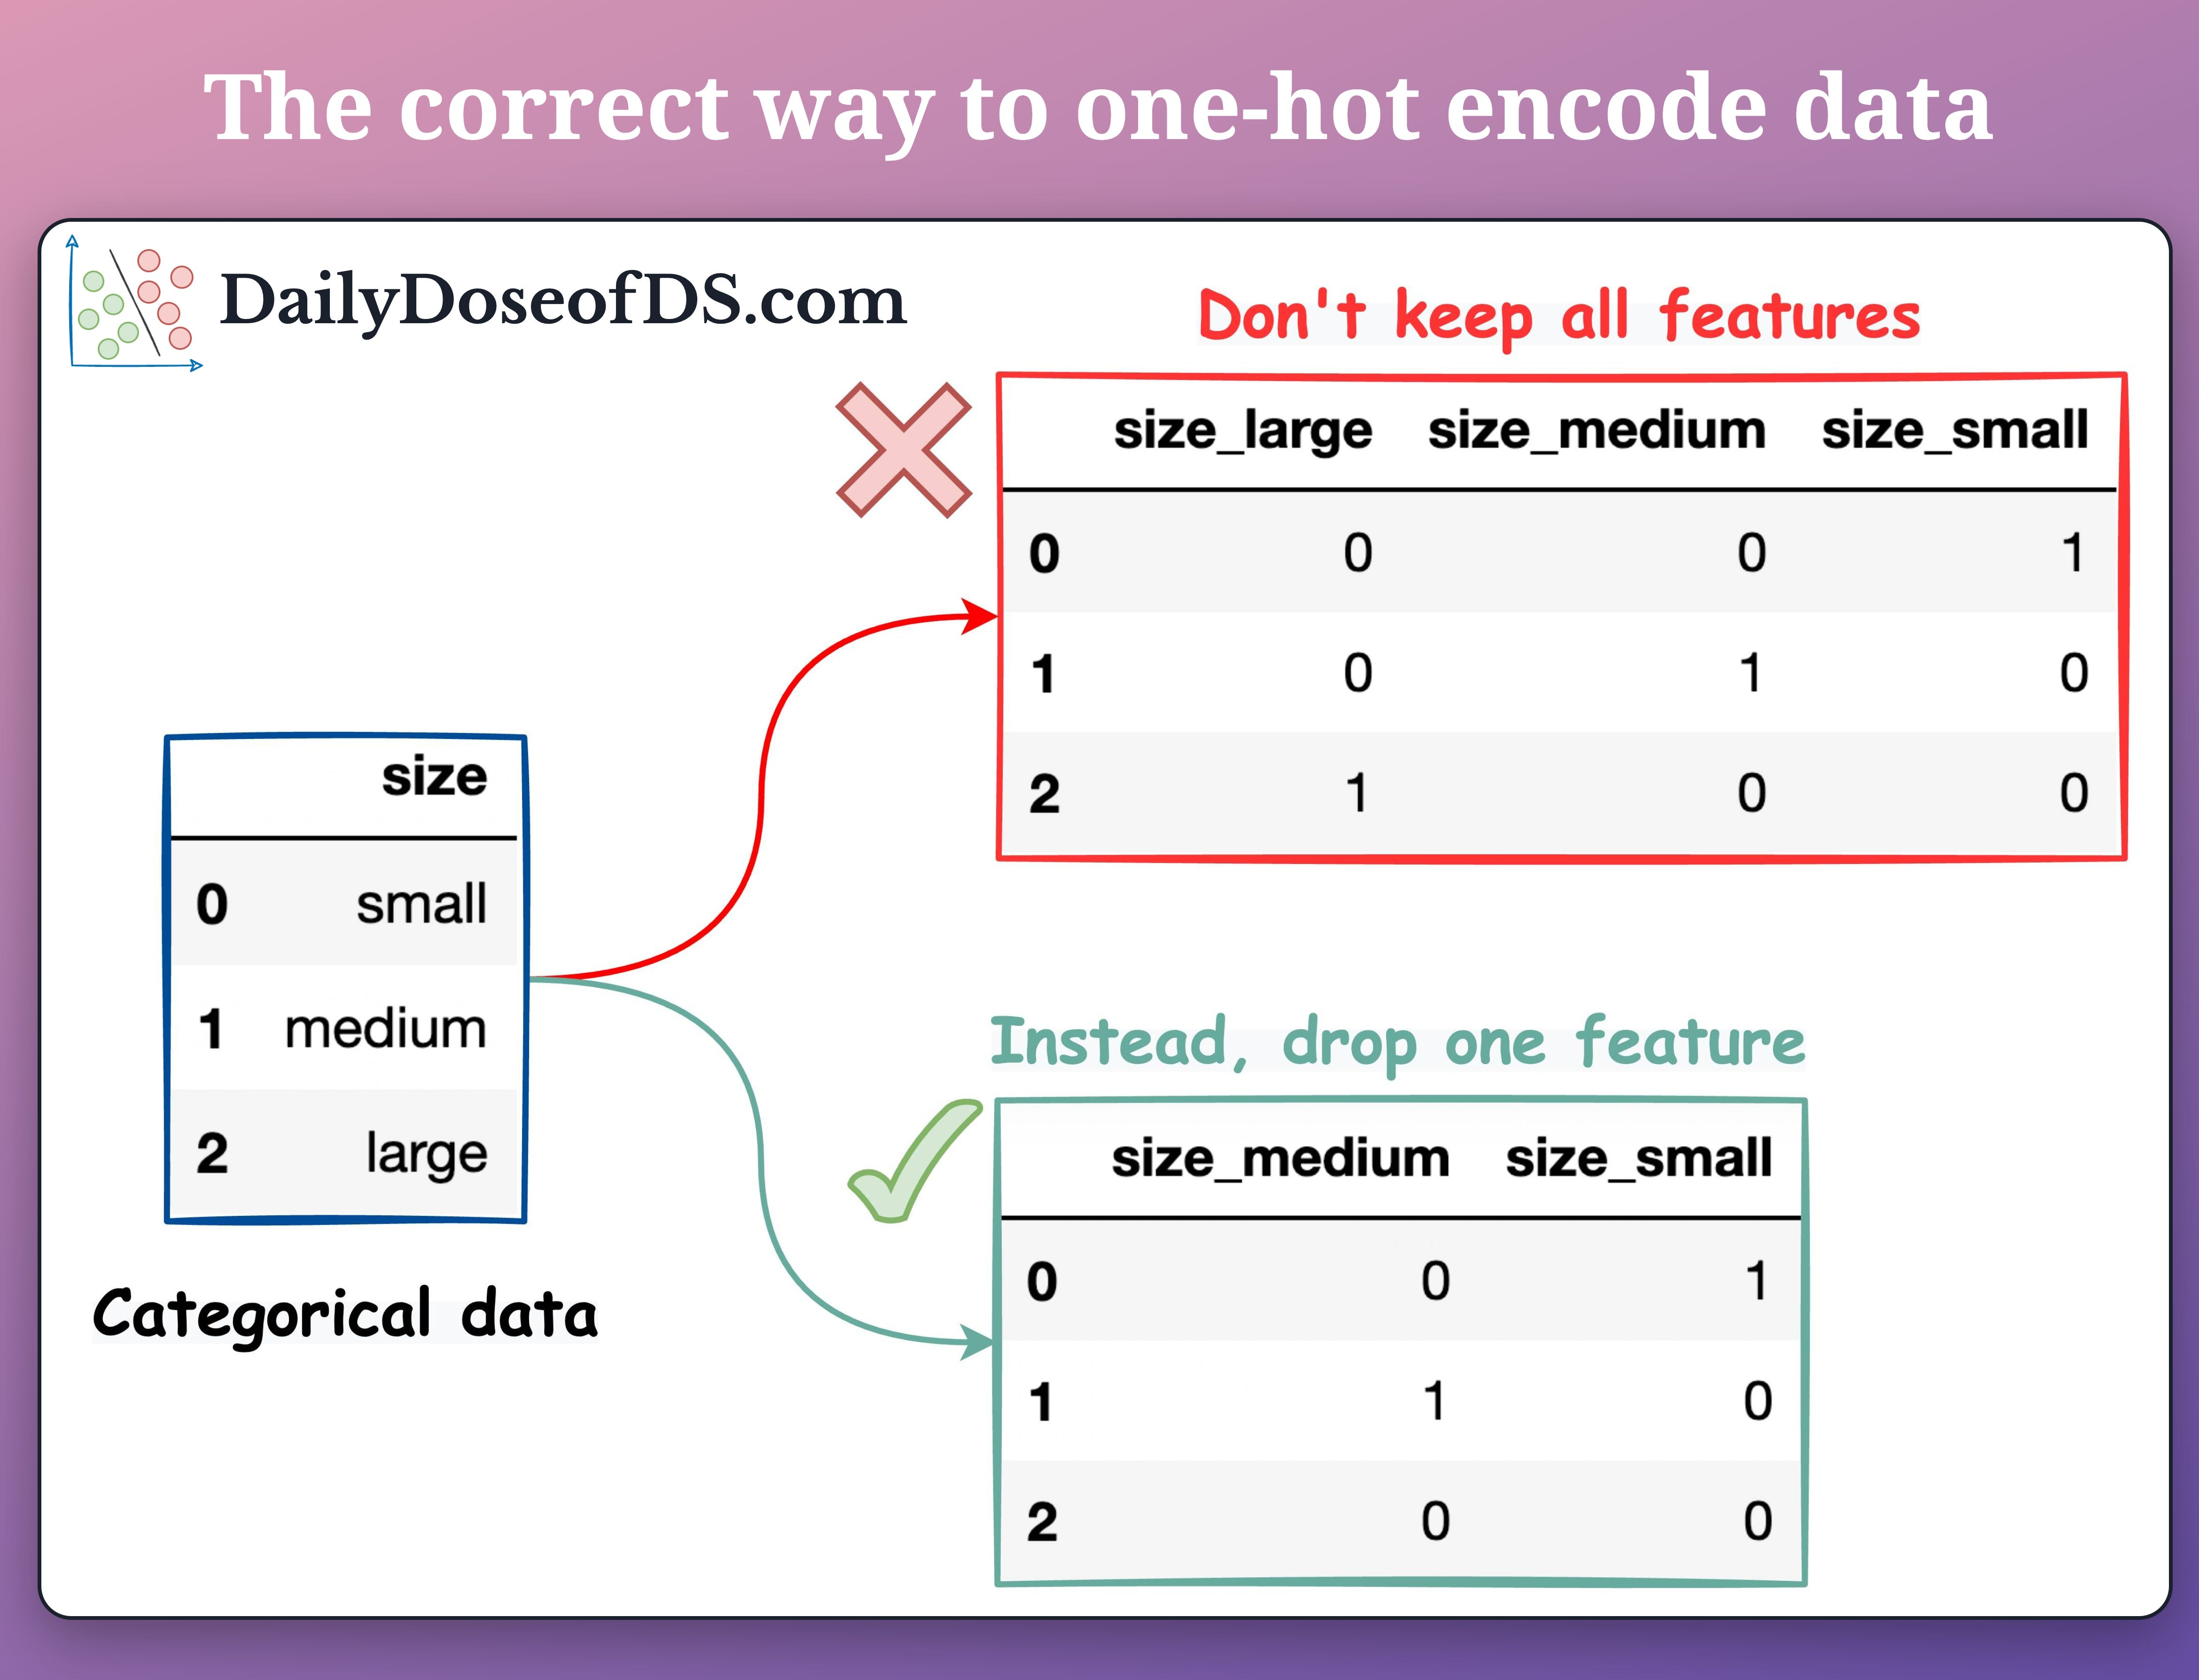
 Source: https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F6f3433d4-52d0-4795-a954-7748f01efb28_4680x3576.png

<h4>Practical Example Using pandas <code>get_dummies()</code></h4>

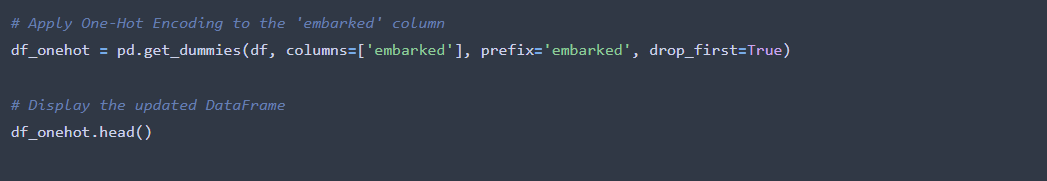

In [9]:
# Apply One-Hot Encoding to the 'embarked' column
df_oneshot = pd.get_dummies(df,columns = ['embarked'],prefix='embarked',drop_first=True)

# Display the updated DataFrame
df_oneshot.head()


survived  pclass     sex   age  sibsp  parch     fare  class    who  \
0         0       3    male  22.0      1      0   7.2500  Third    man   
1         1       1  female  38.0      1      0  71.2833  First  woman   
2         1       3  female  26.0      0      0   7.9250  Third  woman   
3         1       1  female  35.0      1      0  53.1000  First  woman   
4         0       3    male  35.0      0      0   8.0500  Third    man   

   adult_male deck  embark_town alive  alone  sex_encoded  embarked_Q  \
0        True  NaN  Southampton    no  False            1       False   
1       False    C    Cherbourg   yes  False            0       False   
2       False  NaN  Southampton   yes   True            0       False   
3       False    C  Southampton   yes  False            0       False   
4        True  NaN  Southampton    no   True            1       False   

   embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True

<h4>Avoiding the Dummy Variable Trap</h4>
<ul>
<li><strong>Dummy Variable Trap</strong> occurs when one category can be perfectly predicted from the others.</li>
<li>To avoid this, we drop one of the dummy variables using <code>drop_first=True</code>.</li>
</ul>
<h4>Practical Example Using scikit-learn <code>OneHotEncoder</code></h4>

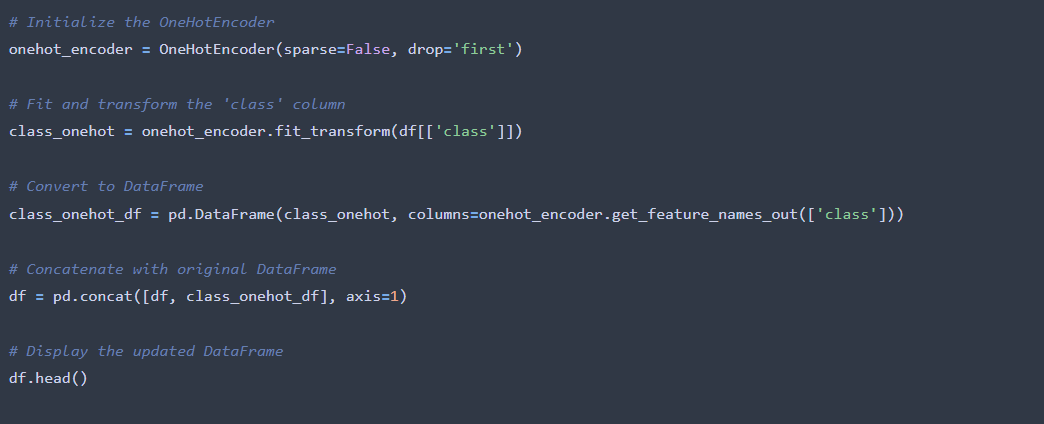

In [12]:
# Initialize the OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the 'class' column
class_onehot = onehot_encoder.fit_transform(df[['class']])

# Convert to DataFrame
class_onehot_df = pd.DataFrame(class_onehot, columns=onehot_encoder.get_feature_names_out(['class']))

# Concatenate with original DataFrame
df = pd.concat([df, class_onehot_df], axis=1)

# Display the updated DataFrame
df.head()


D:\Program Files\New folder\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  sex_encoded  \
0    man        True  NaN  Southampton    no  False            1   
1  woman       False    C    Cherbourg   yes  False            0   
2  woman       False  NaN  Southampton   yes   True            0   
3  woman       False    C  Southampton   yes  False            0   
4    man        True  NaN  Southampton    no   True            1   

   class_Second  class_Third  
0           0.0          1.0  
1           0.0          0.0  
2           0.0          1.0  
3           0.0          0.0  
4           0.0          1.0

---

<h2 id="Step 5.-Advanced-Encoding-Techniques">Step 5. Advanced Encoding Techniques</h2>
<h3 id="5.1-Manual-Mapping-for-Ordinal-Data">5.1 Manual Mapping for Ordinal Data</h3>
<h4 id="Theory">Theory</h4>
<ul>
<li><strong>Manual Mapping</strong> assigns numerical values to categories based on their order.</li>
<li>Preserves the ordinal relationship between categories.</li>
</ul>

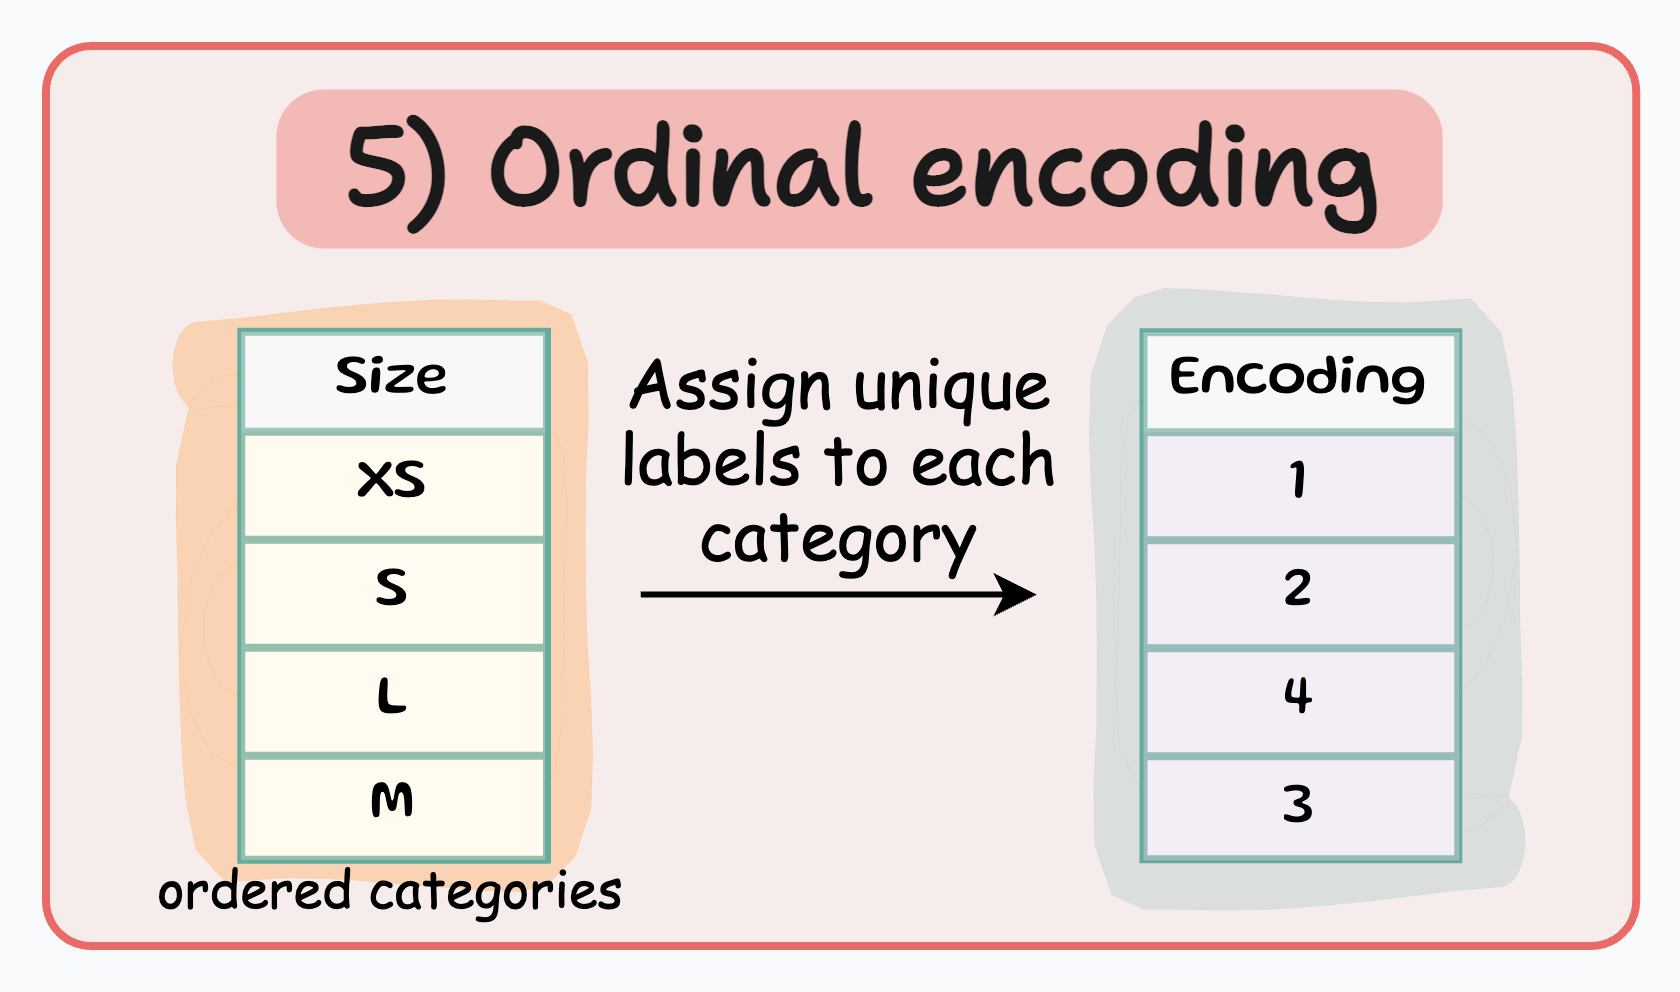
 Source: https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2Ff1f0d759-7b1e-48c2-bf72-06133226ccdc_1680x992.png

<h4 id="Practical-Example-with-'class'-and-'deck'-Columns">Practical Example with 'class' and 'deck' Columns</h4>

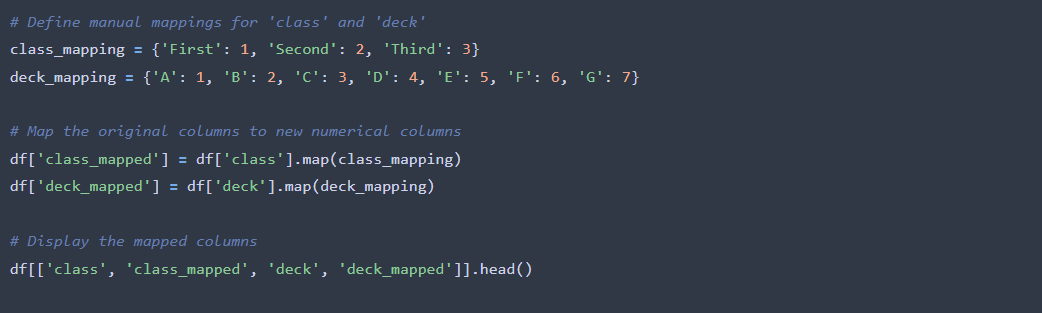

In [13]:

# Define manual mappings for 'class' and 'deck'
class_mapping = {'First': 1, 'Second': 2, 'Third': 3}
deck_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
# Map the original columns to new numerical columns 
df['class_mapped'] = df['class'].map(class_mapping) 
df['deck_mapped'] = df['deck'].map(deck_mapping)
# Display the mapped columns
df[['class', 'class_mapped', 'deck', 'deck_mapped']].head()

class class_mapped deck deck_mapped
0  Third            3  NaN         NaN
1  First            1    C           3
2  Third            3  NaN         NaN
3  First            1    C           3
4  Third            3  NaN         NaN

<h3>5.2 Frequency Encoding</h3>
<h4>Theory</h4>
<ul>
<li><strong>Frequency Encoding</strong> replaces categories with their frequency in the dataset.</li>
<li>Captures the prevalence of each category.</li>
</ul>

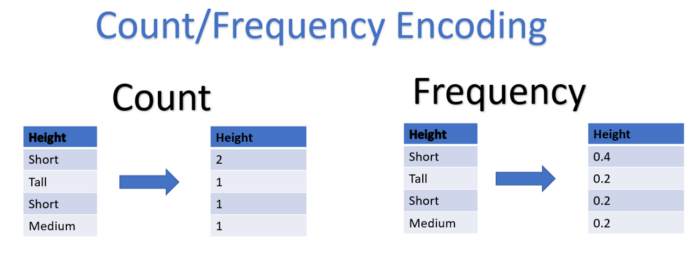
 Source: https://miro.medium.com/v2/resize:fit:1400/1*Dz2M6bYXeWB1QwWYhRqsrQ.png

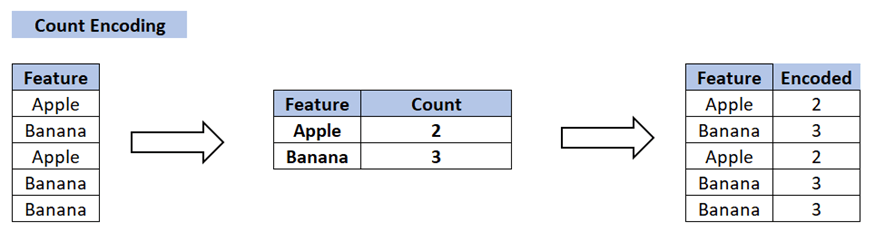
 Source: https://datasciencedojo.com/wp-content/uploads/Categorical-data-encoding-count-encoding.png

<h4>Practical Example with 'embarked' Column</h4>

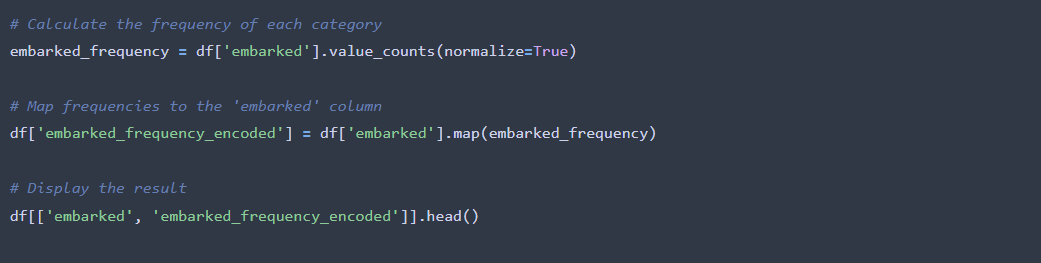

In [14]:
# Calculate the frequency of each category
embarked_frequency = df['embarked'].value_counts(normalize=True)

# Map frequencies to the 'embarked' column
df['embarked_frequency_encoded'] = df['embarked'].map(embarked_frequency)
# Display the result
df[['embarked', 'embarked_frequency_encoded']].head()

embarked  embarked_frequency_encoded
0        S                    0.724409
1        C                    0.188976
2        S                    0.724409
3        S                    0.724409
4        S                    0.724409

<h3>5.3 Target Encoding</h3>
<h4>Theory</h4>
<ul>
<li><strong>Target Encoding</strong> replaces categories with the mean of the target variable for each category.</li>
<li>Useful when there is a strong relationship between the categorical variable and the target.</li>
</ul>

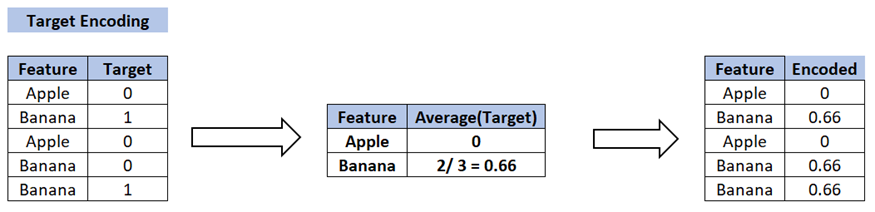
 Source: https://miro.medium.com/v2/resize:fit:1400/1*2J6iTbzpyPTJnUxVmT_vfw.png

<h4>Practical Example with 'sex' Column</h4>

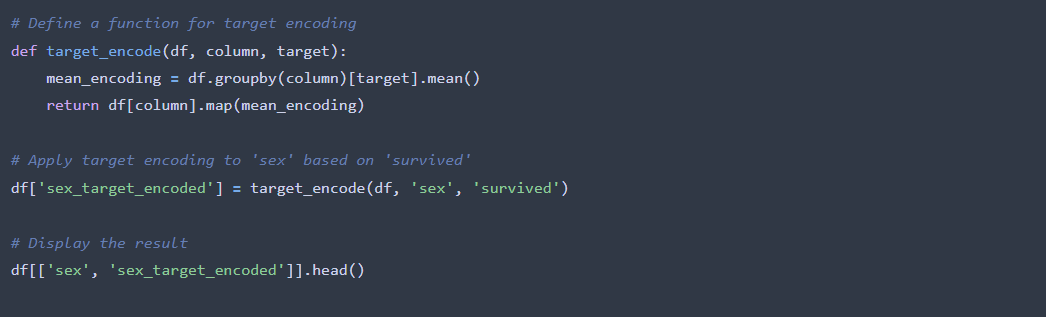

In [16]:
# Define a function for target encoding
def target_encode(df, column, target):
    mean_encoding = df.groupby(column) [target].mean() 
    return df[column].map(mean_encoding)
# Apply target encoding to 'sex' based on 'survived' 
df['sex_target_encoded'] = target_encode(df, 'sex', 'survived')
# Display the result
df[['sex', 'sex_target_encoded']].head()

sex  sex_target_encoded
0    male            0.188908
1  female            0.742038
2  female            0.742038
3  female            0.742038
4    male            0.188908

<h4>Avoiding Data Leakage</h4>
<ul>
<li><strong>Data Leakage</strong> occurs when information from the test set is used in training.</li>
<li>To prevent this, perform target encoding after splitting the data.</li>
</ul>

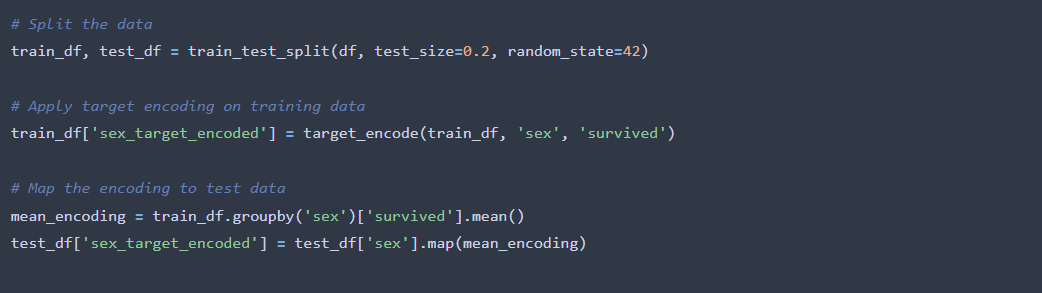

In [19]:
# Split the data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
# Apply target encoding on training data
train_df['sex_target_encoded'] = target_encode(train_df, 'sex', 'survived')
# Map the encoding to test data
mean_encoding = train_df.groupby('sex')['survived'].mean()
test_df['sex_target_encoded'] = test_df['sex'].map(mean_encoding)

---

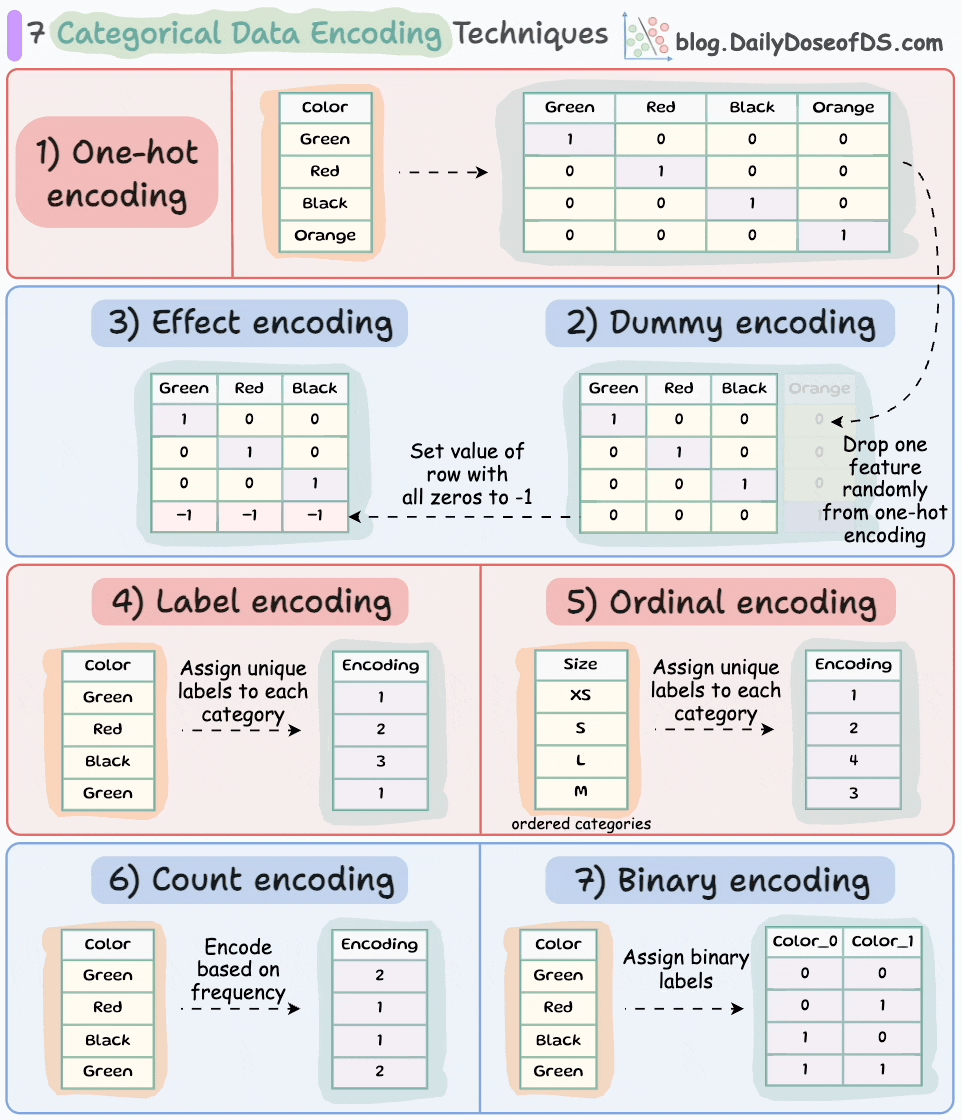
 Source: https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F25e58739-0a9f-42ab-bba6-f932cee49139_962x1120.gif

---

<h2>Step 6. Practical Application: Model Integration</h2>
<p>We will train a Logistic Regression model using the encoded features.</p>
<h3>Prepare the Data</h3>

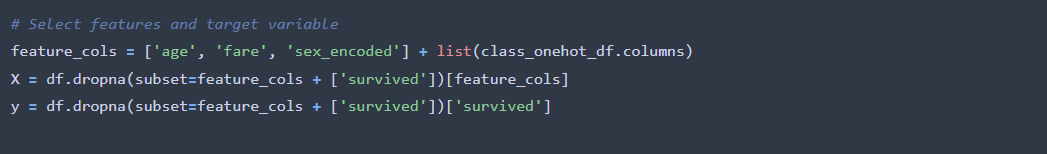

In [20]:
# Select features and target variable
feature_cols = ['age','fare','sex_encoded'] + list(class_onehot_df.columns)
x=df.dropna(subset=feature_cols + ['survived'])[feature_cols]
y=df.dropna(subset=feature_cols + ['survived'])['survived']

<h3>Split the Data</h3>

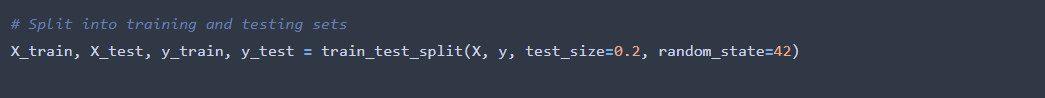

In [23]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)


<h3>Train the Model</h3>

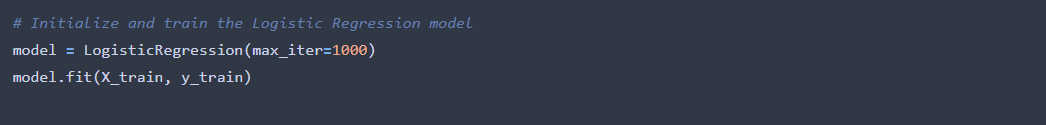

In [25]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

<h3>Evaluate the Model</h3>

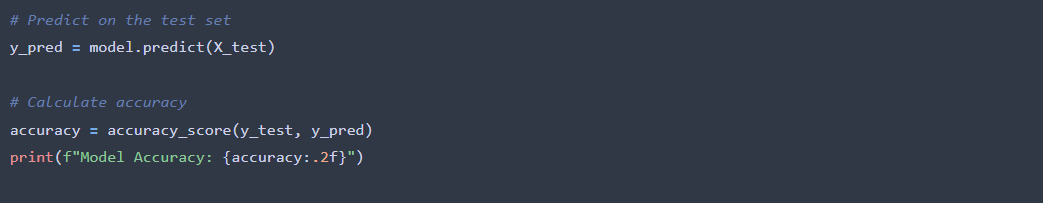

In [26]:
# Predict on the test set
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test,y_pred)
print(f"Model Accuracy: {accuracy:2f}")

Model Accuracy: 0.755245


---

## Step 7. Discussion Questions
1. **When should you use Label Encoding over One-Hot Encoding?**
	- Use Label Encoding when dealing with ordinal variables where the categories have a natural order (e.g., 'low', 'medium', 'high'). It preserves the ordinal relationship.

2. **What potential issues can arise from One-Hot Encoding high-cardinality features?**
	- One-Hot Encoding high-cardinality features can lead to a significant increase in the dimensionality of the dataset, causing increased computational complexity and risk of overfitting.

3. **Why is it important to avoid data leakage in Target Encoding?**
	- Data leakage in Target Encoding can lead to overly optimistic performance estimates because the model gains access to information from the test set during training, which compromises the model's ability to generalize to unseen data.

4. **What are the pros and cons of dropping one dummy variable in One-Hot Encoding?**
	- **Pros**: Prevents multicollinearity, ensuring that the model coefficients are stable and the feature matrix is full rank.
	- **Cons**: May result in loss of information, especially in non-linear models where multicollinearity is less of a concern.

---

<h2>Step 8. Practice Tasks</h2>
<ul>
<li>
<p><strong>Task 1:</strong> Apply Label Encoding to the 'who' column and add it to the DataFrame.</p>
</li>
</ul>

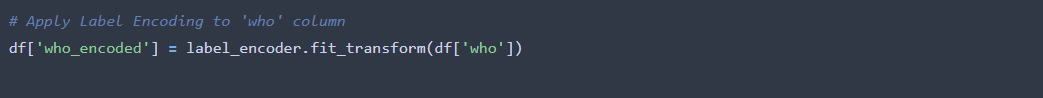

In [27]:
# Apply Label Encoding to 'who' column
df['who_encoded'] = label_encoder.fit_transform(df['who'])


<ul>
<li>
<p><strong>Task 2:</strong> Apply One-Hot Encoding to the 'deck' column using get_dummies().</p>
</li>
</ul> 

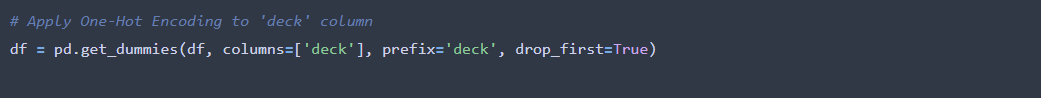

In [28]:
# Apply One-Hot Encoding to 'deck' column
df = pd.get_dummies(df,columns=['deck'], prefix='deck',drop_first=True)


<ul>
<li>
<p><strong>Task 3:</strong> Apply Frequency Encoding to the 'who' column and compare it with One-Hot Encoding.</p>
</li>
</ul>

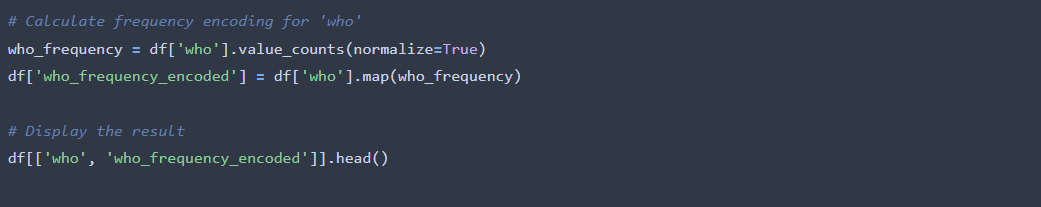

In [29]:
# Calculate frequency encoding for 'who'
who_frequency = df['who'].value_counts(normalize=True)
df['who_frequency_encoded'] = df['who'].map(who_frequency)
# Display the result
df[['who','who_frequency_encoded']].head()

who  who_frequency_encoded
0    man               0.602694
1  woman               0.304153
2  woman               0.304153
3  woman               0.304153
4    man               0.602694

---

<h2>Step 9. Pros and Cons of Encoding Techniques</h2>
<h3>Label Encoding</h3>
<ul>
<li>
<p><strong>Pros:</strong></p>
<ul>
<li>Simple to implement.</li>
<li>Useful for ordinal variables.</li>
<li>Does not increase dimensionality.</li>
</ul>
</li>
<li>
<p><strong>Cons:</strong></p>
<ul>
<li>Introduces ordinal relationships in nominal data.</li>
<li>May mislead algorithms that interpret numerical values as having order.</li>
</ul>
</li>
</ul>
<h3>One-Hot Encoding</h3>
<ul>
<li>
<p><strong>Pros:</strong></p>
<ul>
<li>Suitable for nominal variables.</li>
<li>Does not introduce ordinal relationships.</li>
<li>Widely supported by machine learning algorithms.</li>
</ul>
</li>
<li>
<p><strong>Cons:</strong></p>
<ul>
<li>Increases dimensionality, especially with high-cardinality features.</li>
<li>May lead to the dummy variable trap if not handled properly.</li>
</ul>
</li>
</ul>
<h3>Manual Mapping for Ordinal Data</h3>
<ul>
<li>
<p><strong>Pros:</strong></p>
<ul>
<li>Preserves the inherent order of categories.</li>
<li>Simple and intuitive.</li>
</ul>
</li>
<li>
<p><strong>Cons:</strong></p>
<ul>
<li>Requires domain knowledge to assign appropriate numerical values.</li>
<li>Not suitable for nominal variables.</li>
</ul>
</li>
</ul>
<h3>Frequency Encoding</h3>
<ul>
<li>
<p><strong>Pros:</strong></p>
<ul>
<li>Handles high-cardinality features without increasing dimensionality.</li>
<li>Retains information about category prevalence.</li>
</ul>
</li>
<li>
<p><strong>Cons:</strong></p>
<ul>
<li>May introduce ordinal relationships where none exist.</li>
<li>Less interpretable than One-Hot Encoding.</li>
</ul>
</li>
</ul>
<h3>Target Encoding</h3>
<ul>
<li>
<p><strong>Pros:</strong></p>
<ul>
<li>Captures the relationship between categorical variables and the target.</li>
<li>Can improve model performance.</li>
</ul>
</li>
<li>
<p><strong>Cons:</strong></p>
<ul>
<li>Risk of data leakage if not properly applied.</li>
<li>May lead to overfitting, especially with rare categories.</li>
<li>Requires careful cross-validation.</li>
</ul>
</li>
</ul>

---

<h2>Step 10. Conclusion</h2>
<p>In this lab, we explored various techniques for encoding categorical data:</p>
<ul>
<li><strong>Label Encoding</strong> assigns numerical values to categories but may introduce unintended order.</li>
<li><strong>One-Hot Encoding</strong> creates binary columns for each category, suitable for nominal data but increases dimensionality.</li>
<li><strong>Manual Mapping</strong> is ideal for ordinal data, preserving the order.</li>
<li><strong>Frequency Encoding</strong> replaces categories with their frequency, useful for high-cardinality features.</li>
<li><strong>Target Encoding</strong> encodes categories based on the target variable, capturing relationships but risks data leakage.</li>
</ul>
<p>Understanding the pros and cons of each method is crucial for preparing data effectively for machine learning models. Always consider the nature of your data and the requirements of your chosen algorithm when selecting an encoding technique.</p>

---

# Submission
Submit all files to myConnexion.